*TASK 1*: **Prediction using Supervised ML**

Author: Onez Chowdhury


In [ ]:
#importing libraries recquired for this project
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [ ]:
#Reading data
data= pd.read_csv('http://bit.ly/w-data')
data.head(15)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
#Checking null value
data.isnull == True 

False

**VISUALIZING DATA**

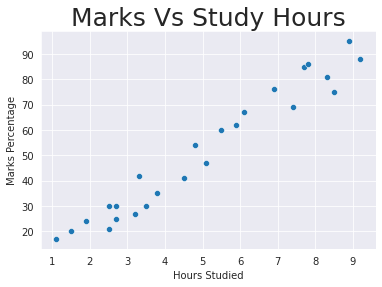

In [ ]:
#Scatter plot
sns.set_style('darkgrid')
sns.scatterplot(y= data['Scores'], x= data['Hours'])
plt.title('Marks Vs Study Hours',size=25)
plt.ylabel('Marks Percentage', size=10)
plt.xlabel('Hours Studied', size=10)
plt.show()

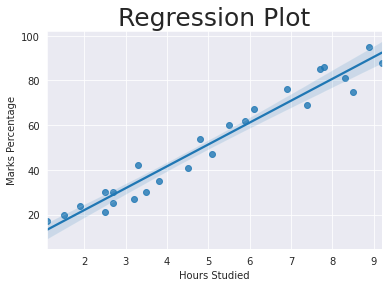

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [ ]:
#Confirming the correlation by ploting a regression line between the 'Marks Percentage' and 'Hours Studied'.
sns.regplot(x= data['Hours'], y= data['Scores'])
plt.title('Regression Plot',size=25)
plt.ylabel('Marks Percentage', size=10)
plt.xlabel('Hours Studied', size=10)
plt.show()
print(data.corr())



**TRAINING THE MODEL**

In [ ]:
#Dividing the data into "attributes"(inputs) and "labels"(outputs).
x = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

train_x, val_x, train_y, val_y = train_test_split(x, y, random_state = 0)

In [ ]:
#Fitting the Data into the model
regression = LinearRegression()
regression.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#Predicting the percentage of Marks
pred_y = regression.predict(val_x)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_x], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


In [ ]:
#Comparing Predicted Marks with the Actual Marks
compare_scores = pd.DataFrame({'Actual Marks': val_y, 'Predicted Marks': pred_y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


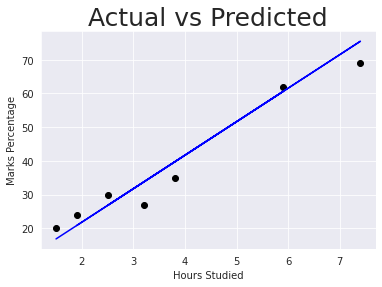

In [ ]:
#Visualization of the comparison between predicted marks and actual marks

plt.scatter(x=val_x, y=val_y, color='black')
plt.plot(val_x, pred_y, color='Blue')
plt.title('Actual vs Predicted', size=25)
plt.ylabel('Marks Percentage', size=10)
plt.xlabel('Hours Studied', size=10)
plt.show()



In [ ]:
#Calculating Model Accuracy
print('Mean absolute error: ',mean_absolute_error(val_y,pred_y))

Mean absolute error:  4.130879918502482


*Small value of Mean absolute error states that the chances of error or wrong forecasting through the model are very less.*

In [ ]:
#Final Result
#Predicted score if a student studies for 9.25 hrs/ day.
hours = [9.25]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],2)))

Score = 93.89


**Here, we used regression model to predict the marks. So, if a student studies for 9.25 hours for a day he/she is likely to score *93.89* marks.**